In [1]:
# packages needed
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


#for lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# reading in data
file_path = "Student Depression Dataset.csv"
data = pd.read_csv(file_path)
data.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Exploratory Data Analysis

#### meaningful stats/metrics from the data

In [3]:
...

Ellipsis

In [ ]:
healthy_only = data[data['Dietary Habits'] == 'Healthy']
healthy_only[['Academic Pressure', 'Study Satisfaction',\
              'Have you ever had suicidal thoughts ?',\
               'Work/Study Hours', 'Financial Stress',\
                'Family History of Mental Illness', 'Depression']]

,Academic Pressure,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,5.0,2.0,Yes,3.0,1.0,No,1
2,3.0,5.0,No,9.0,1.0,Yes,0
5,2.0,3.0,No,4.0,1.0,No,0
6,3.0,4.0,No,1.0,2.0,No,0
11,3.0,4.0,Yes,10.0,2.0,Yes,0
...,...,...,...,...,...,...,...
27889,1.0,2.0,Yes,2.0,2.0,No,0
27894,3.0,2.0,Yes,12.0,4.0,No,0
27897,2.0,3.0,No,0.0,3.0,Yes,0
27899,5.0,2.0,Yes,10.0,5.0,No,1


In [5]:
healthy_only[['Academic Pressure', 'Study Satisfaction',\
               'Work/Study Hours', 'Financial Stress','Depression']].mean()

Academic Pressure     2.994511
Study Satisfaction    2.998954
Work/Study Hours      7.019605
Financial Stress      2.999346
Depression            0.453928
dtype: float64

In [6]:
healthy_only[['Academic Pressure', 'Study Satisfaction',\
               'Work/Study Hours', 'Financial Stress','Depression']].median()

Academic Pressure     3.0
Study Satisfaction    3.0
Work/Study Hours      8.0
Financial Stress      3.0
Depression            0.0
dtype: float64

- looking at some of the columns' unique values (mostly qualitative/non-numeric)

In [7]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [8]:
data['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

In [9]:
data['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [10]:
data['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

#### Visualizations and Graphs

Text(0.5, 0, 'Academic Pressure (scaled 0-5)')

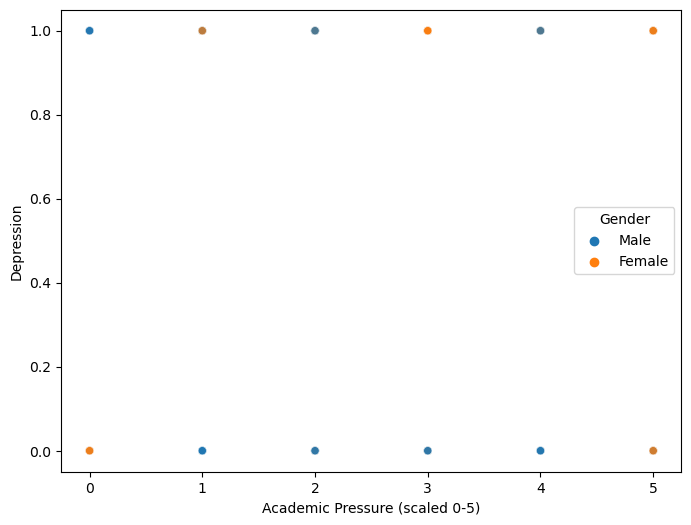

In [11]:
# relationship between academic pressure and depression
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Academic Pressure', y='Depression', \
                hue='Gender', alpha=0.7)
plt.xlabel("Academic Pressure (scaled 0-5)")

#plt.scatter(data['Academic Pressure'], data['Depression'])

AttributeError: 'Rectangle' object has no property 'errorbar'

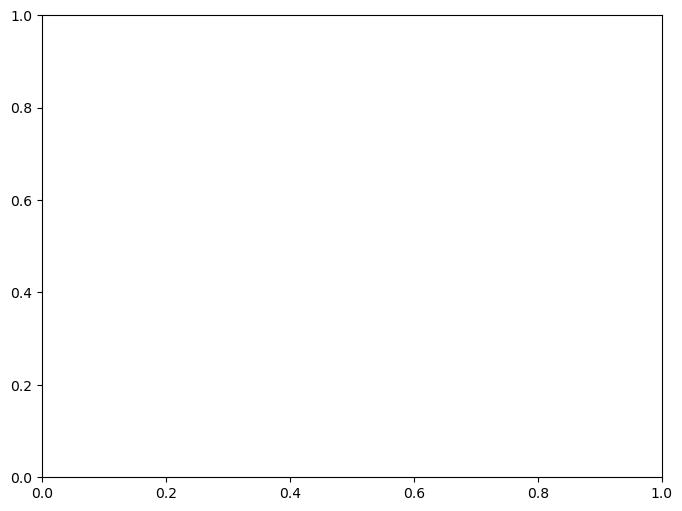

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Depression', y='Academic Pressure', errorbar='sd')
plt.xlabel(" Depression (Binary Value) ")
plt.ylabel("Academic Pressure (scaled 0-5)")
plt.show()

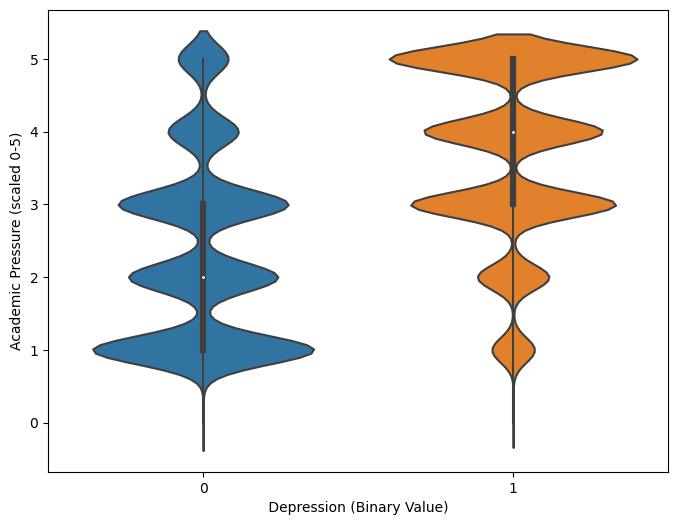

In [17]:
# Violin plot ????
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Depression', y='Academic Pressure')
plt.xlabel(" Depression (Binary Value) ")
plt.ylabel("Academic Pressure (scaled 0-5)")
plt.show()

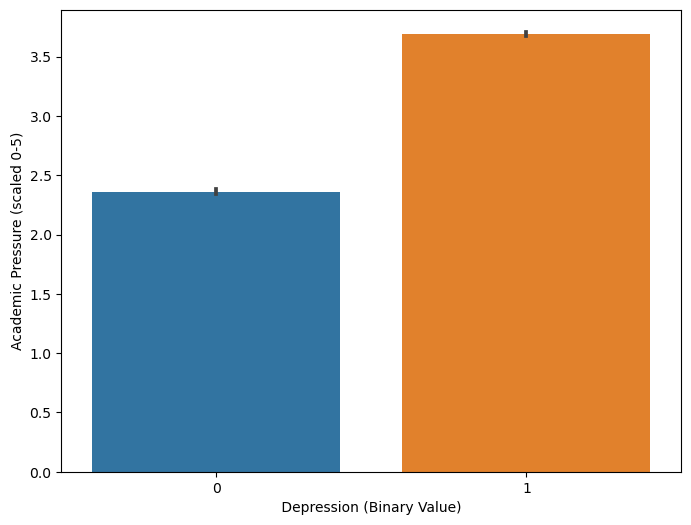

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Depression', y='Academic Pressure')
plt.xlabel(" Depression (Binary Value) ")
plt.ylabel("Academic Pressure (scaled 0-5)")
plt.show()

AttributeError: 'Rectangle' object has no property 'errorbar'

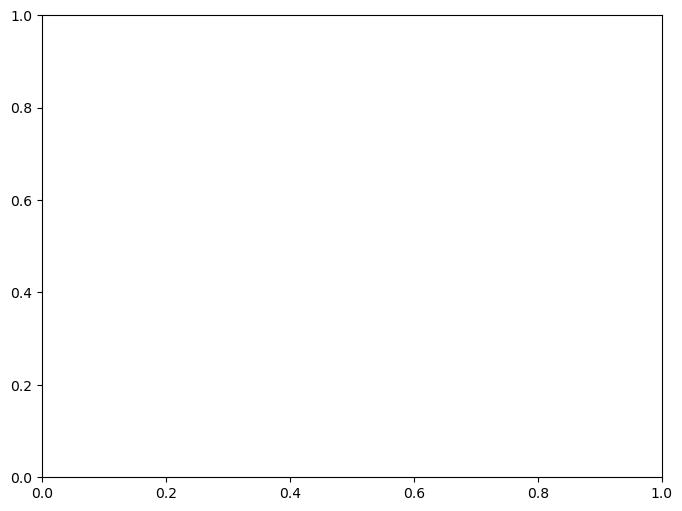

In [19]:
# Depression and Financial Stress
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Depression', y='Financial Stress', errorbar='sd')
plt.xlabel(" Depression (Binary Value) ")
plt.ylabel("Financial Stress (scaled 0-5)")
plt.show()

In [ ]:
# Depression and Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depression', y='Age')
plt.xlabel("Depression (Binary Value)")
plt.ylabel("Age")
plt.show()

In [ ]:
# Depression and Financial Stress
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depression', y='Financial Stress')
plt.xlabel("Depression (Binary Value)")
plt.ylabel("Financial Stress (scaled 0-5)")
plt.show()

In [ ]:
# Depression and Academic Pressure
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depression', y='Academic Pressure')
plt.xlabel("Depression (Binary Value)")
plt.ylabel("Academic Pressure (scaled 0-5)")
plt.show()

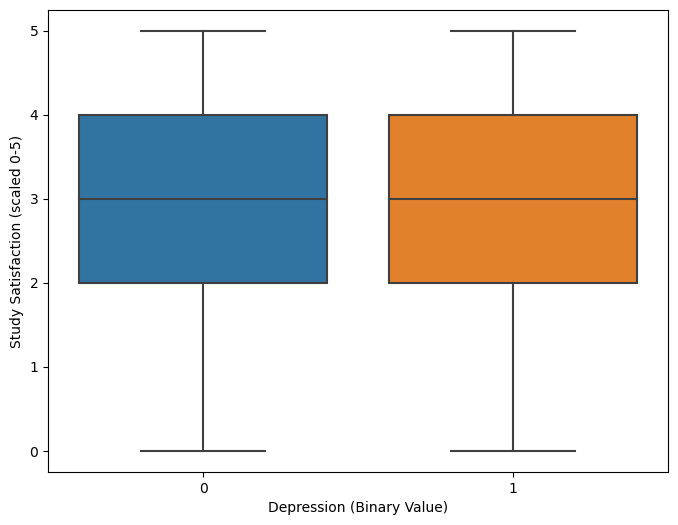

In [20]:
# Depression and Study Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depression', y='Study Satisfaction')
plt.xlabel("Depression (Binary Value)")
plt.ylabel("Study Satisfaction (scaled 0-5)")
plt.show()

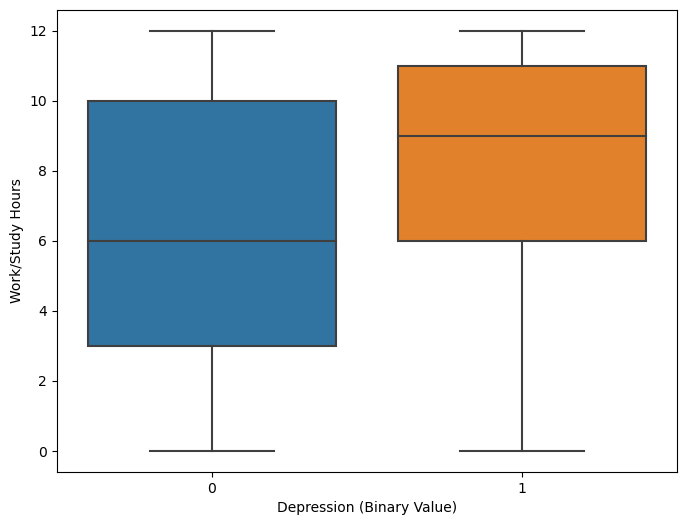

In [21]:
# Work/Study Hours
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depression', y='Work/Study Hours')
plt.xlabel("Depression (Binary Value)")
plt.ylabel("Work/Study Hours")
plt.show()

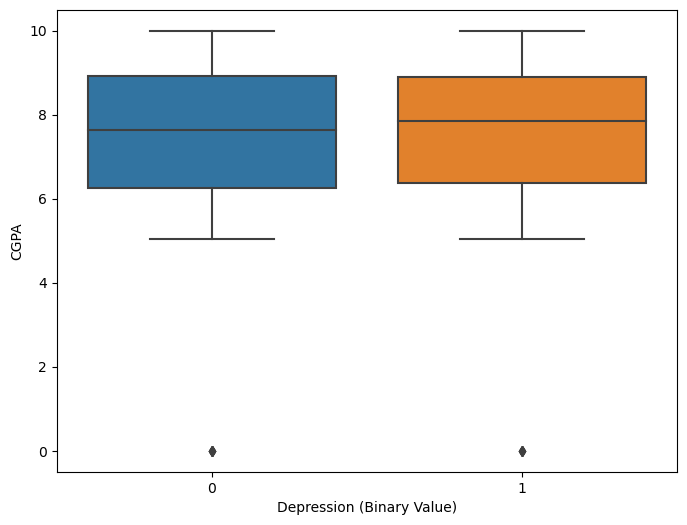

In [22]:
# CGPA (0-10?)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Depression', y='CGPA')
plt.xlabel("Depression (Binary Value)")
plt.ylabel("CGPA")
plt.show()

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparat

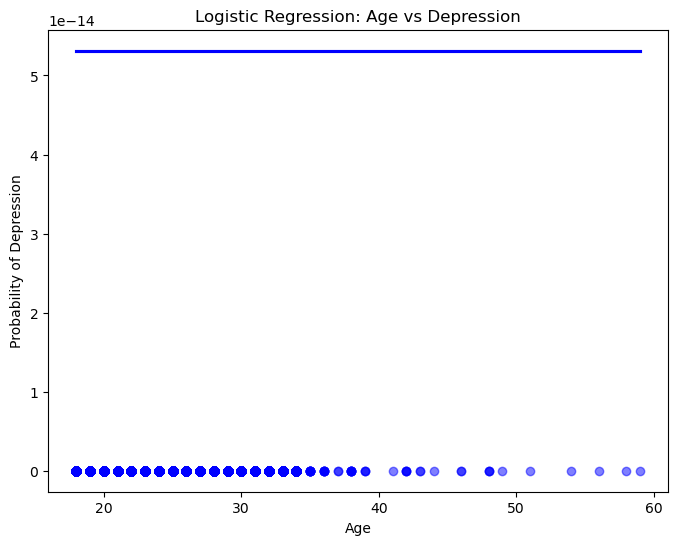

In [23]:
## NOT HELPFUL -> depression is binary, solution???
# Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='Age', y=(data['Depression'] == 'Yes').astype(int), \
            logistic=True, ci=None, color='blue', scatter_kws={'alpha': 0.5})
plt.title('Logistic Regression: Age vs Depression')
plt.xlabel('Age')
plt.ylabel('Probability of Depression')
plt.show()

In [39]:
good_cities = np.array((data['City'].value_counts() > 2))

In [56]:
t_loc = data['City'].value_counts()>2
good_cities = t_loc.index[t_loc == True]

In [58]:
def checking(city):
    return city in good_cities
city_filtered = data[data["City"].apply(checking)]
city_filtered["City"].value_counts()

Kalyan           1564
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1289
Lucknow          1155
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1066
Jaipur           1034
Patna            1006
Pune              968
Visakhapatnam     968
Ahmedabad         949
Bhopal            933
Chennai           884
Meerut            822
Rajkot            815
Delhi             767
Bangalore         766
Ghaziabad         744
Mumbai            698
Vadodara          693
Varanasi          685
Nagpur            651
Indore            643
Kanpur            607
Nashik            547
Faridabad         461
Name: City, dtype: int64

In [62]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [10]:
data = data[data["Profession"] == "Student"]

# Performing Lasso Feature Selection

In [63]:
df_LASSO = city_filtered.dropna()
df_LASSO = df_LASSO.replace({'Yes': 1, 'No': 0})
df_LASSO = pd.get_dummies(df_LASSO, drop_first=True)
df_LASSO

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,3.0,...,0,0,0,0,0,0,0,1,0,0
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,2.0,...,0,0,0,0,1,0,0,0,0,0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Segregating the Feature and Target
X = df_LASSO.drop("Depression", axis=1).values
y = df_LASSO["Depression"].values
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (22272, 75)
Shape of Test Features: (5569, 75)
Shape of Train Target: (22272,)
Shape of Test Target: (5569,)


In [65]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [66]:
names=df_LASSO.drop("Depression", axis=1).columns
#print("Column Names: {}".format(names.values))

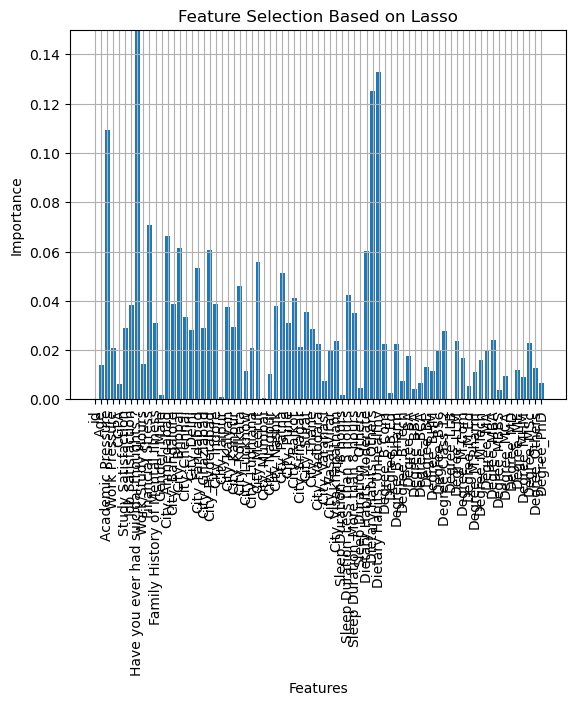

In [67]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [70]:
feature_subset=np.array(names)[lasso1_coef>0.05]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, "Depression")
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['Academic Pressure' 'Have you ever had suicidal thoughts ?'
 'Financial Stress' 'City_Ahmedabad' 'City_Bhopal' 'City_Faridabad'
 'City_Hyderabad' 'City_Meerut' 'City_Patna' 'Dietary Habits_Moderate'
 'Dietary Habits_Others' 'Dietary Habits_Unhealthy']
Selected Columns: ['Academic Pressure' 'Have you ever had suicidal thoughts ?'
 'Financial Stress' 'City_Ahmedabad' 'City_Bhopal' 'City_Faridabad'
 'City_Hyderabad' 'City_Meerut' 'City_Patna' 'Dietary Habits_Moderate'
 'Dietary Habits_Others' 'Dietary Habits_Unhealthy' 'Depression']


In [71]:
len(feature_subset), len(df_LASSO.columns)

(13, 76)